In [1]:
# -*- coding: utf-8 -*-
from __future__ import division
from pandas import Series, DataFrame
import pandas as pd
from numpy.random import randn
import numpy as np
pd.options.display.max_rows = 12
np.set_printoptions(precision=4, suppress=True)
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(12, 4))


In [2]:
from datetime import datetime
now = datetime.now()
print(now)
print(now.year, now.month, now.day,)
print(now.hour,":", now.minute,":", now.second)

2018-06-05 14:47:49.551787
2018 6 5
14 : 47 : 49


In [3]:
delta = datetime(2011, 1, 7) - datetime(2008, 6, 24, 8, 15)
print(delta)
print(delta.days)
print(delta.seconds)

926 days, 15:45:00
926
56700


In [4]:
from datetime import timedelta
start = datetime(2011, 1, 7)
timedelta(12)
start + timedelta(12)
start - 2 * timedelta(12)

datetime.datetime(2010, 12, 14, 0, 0)

In [5]:
#字符串转日期
stamp = datetime(2011, 1, 3)
print(str(stamp))
stamp.strftime('%Y-%m-%d')


value = '2011-01-03'
datetime.strptime(value, '%Y-%m-%d')

datestrs = ['7/6/2011', '8/6/2011']
[datetime.strptime(x, '%m/%d/%Y') for x in datestrs]

2011-01-03 00:00:00


[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

In [6]:
from dateutil.parser import parse
parse('2011-01-03')
parse('Jan 31, 1997 10:45 PM')
parse('6/12/2011', dayfirst=True)
parse('6/12/2011', dayfirst=False)

datetime.datetime(2011, 6, 12, 0, 0)

In [7]:
datestrs
pd.to_datetime(datestrs)
pd.to_datetime(datestrs,dayfirst=True)

DatetimeIndex(['2011-06-07', '2011-06-08'], dtype='datetime64[ns]', freq=None)

In [8]:
idx = pd.to_datetime(datestrs + [None])
print(idx)
print(idx[2])
pd.isnull(idx)

DatetimeIndex(['2011-07-06', '2011-08-06', 'NaT'], dtype='datetime64[ns]', freq=None)
NaT


array([False, False,  True])

In [9]:
#pands中的时间序列
from datetime import datetime
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5), datetime(2011, 1, 7),
         datetime(2011, 1, 8), datetime(2011, 1, 10), datetime(2011, 1, 12)]
ts = Series(np.random.randn(6), index=dates)
print(ts)
type(ts)

ts.index

ts + ts[::2]

ts.index.dtype

stamp = ts.index[0]
stamp

2011-01-02    0.297334
2011-01-05    0.854075
2011-01-07    0.337692
2011-01-08   -0.081994
2011-01-10    1.365378
2011-01-12    2.479132
dtype: float64


Timestamp('2011-01-02 00:00:00')

In [10]:
#索引、选取与子集构造
stamp = ts.index[2]
ts[stamp]

ts['1/10/2011']

ts['20110110']

1.3653782925633118

In [11]:
longer_ts = Series(np.random.randn(1000),
                   index=pd.date_range('1/1/2000', periods=1000))
longer_ts

longer_ts['2001']

longer_ts['2001-05']

2001-05-01    0.260560
2001-05-02    0.063208
2001-05-03    1.507880
2001-05-04    0.602785
2001-05-05    0.683143
2001-05-06    1.747612
                ...   
2001-05-26   -0.057086
2001-05-27   -1.379316
2001-05-28   -0.133236
2001-05-29    0.462880
2001-05-30   -0.215448
2001-05-31   -1.391932
Freq: D, Length: 31, dtype: float64

In [12]:
ts
ts[datetime(2011, 1, 7):]


ts['1/6/2011':'1/11/2011']

ts.truncate(after='1/9/2011')

2011-01-02    0.297334
2011-01-05    0.854075
2011-01-07    0.337692
2011-01-08   -0.081994
dtype: float64

In [13]:
dates = pd.date_range('1/1/2000', periods=100, freq='W-WED')
long_df = DataFrame(np.random.randn(100, 4),
                    index=dates,
                    columns=['Colorado', 'Texas', 'New York', 'Ohio'])

long_df.ix['5-2001']

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


,Colorado,Texas,New York,Ohio
2001-05-02,0.566735,-2.979095,-0.932457,-2.251081
2001-05-09,0.072971,0.481428,1.559301,-0.260044
2001-05-16,0.359342,-0.532417,-1.681238,-0.714134
2001-05-23,1.514406,1.436315,1.250060,-0.317076
2001-05-30,1.758351,-1.304031,1.388464,0.811179


In [14]:
#
dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000', '1/2/2000',
                          '1/3/2000'])
dup_ts = Series(np.arange(5), index=dates)
dup_ts

dup_ts.index.is_unique

dup_ts['1/3/2000'] 

dup_ts['1/2/2000']

grouped = dup_ts.groupby(level=0)
grouped.mean()

grouped.count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

In [15]:
#日期范围、频率与移动
ts
ts.resample('D').mean() # 补齐日期

index = pd.date_range('4/1/2012', '6/1/2012')
index

pd.date_range(start='4/1/2012', periods=20)

pd.date_range(end='6/1/2012', periods=20)

pd.date_range('1/1/2000', '12/1/2000', freq='BM') # 每月最后一个工作日组,business end of month

pd.date_range('5/2/2012 12:56:31', periods=5)

pd.date_range('5/2/2012 12:56:31', periods=5, normalize=True) #不要时间

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

In [16]:
from pandas.tseries.offsets import Hour, Minute
hour = Hour()
hour


four_hours = Hour(4)
four_hours

pd.date_range('1/1/2000', '1/3/2000 23:59', freq='4h')

Hour(2) + Minute(30)

pd.date_range('1/1/2000', periods=10, freq='1h30min')


rng = pd.date_range('1/1/2012', '9/1/2012', freq='WOM-3FRI') #以WOM开头，能产生诸如“每月第三个星期五
list(rng)

[Timestamp('2012-01-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-02-17 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-03-16 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-04-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-05-18 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-06-15 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-07-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-08-17 00:00:00', freq='WOM-3FRI')]

In [17]:
# shift是时间列的每个值进行移动
ts = Series(np.random.randn(4),
            index=pd.date_range('1/1/2000', periods=4, freq='M'))
ts

ts.shift(2)

ts.shift(-2)

ts / ts.shift(1) - 1

print(ts.shift(2, freq='M')) #日期移动了两月，数据不变

print(ts.shift(3, freq='D'))

print(ts.shift(1, freq='3D'))

ts.shift(1, freq='90T') # 90T == 90minute
ts.shift(1, freq='120T') # 120T == 120minute

2000-03-31    0.585266
2000-04-30   -0.806219
2000-05-31   -0.134708
2000-06-30   -0.300880
Freq: M, dtype: float64
2000-02-03    0.585266
2000-03-03   -0.806219
2000-04-03   -0.134708
2000-05-03   -0.300880
dtype: float64
2000-02-03    0.585266
2000-03-03   -0.806219
2000-04-03   -0.134708
2000-05-03   -0.300880
dtype: float64


2000-01-31 02:00:00    0.585266
2000-02-29 02:00:00   -0.806219
2000-03-31 02:00:00   -0.134708
2000-04-30 02:00:00   -0.300880
Freq: M, dtype: float64

In [18]:
from pandas.tseries.offsets import Day, MonthEnd
now = datetime(2011, 11, 17)
now + 3 * Day()

now + MonthEnd()

now + MonthEnd(2)

offset = MonthEnd()
offset.rollforward(now)#2011年11月17日的下一个月末

offset.rollback(now)#2011年11月17日的前一个月末

Timestamp('2011-10-31 00:00:00')

In [19]:
ts = Series(np.random.randn(20),
            index=pd.date_range('1/15/2000', periods=20, freq='4d'))
ts.groupby(offset.rollforward).mean()

ts.resample('M', how='mean')

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  """


2000-01-31    0.331431
2000-02-29    0.453219
2000-03-31   -0.358279
Freq: M, dtype: float64

In [20]:
##时间序列可视化

import os

o =os.getcwd()
filename = o+"\\stock_px.csv"
#close_px_all= pd.read_csv(filename,encoding="gbk")

close_px_all= pd.read_csv(filename,encoding="gbk", parse_dates=True, index_col=0)
close_px_all.head()

,AAPL,MSFT,XOM,SPX
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01
2003-01-07,7.43,21.93,28.95,922.93
2003-01-08,7.28,21.31,28.83,909.93


In [21]:
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]
close_px = close_px.resample('B', fill_method='ffill').ffill()
close_px.head()

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: fill_method is deprecated to .resample()
the new syntax is .resample(...).ffill()
  


,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83


In [22]:
close_px.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2292 entries, 2003-01-02 to 2011-10-14
Freq: B
Data columns (total 3 columns):
AAPL    2292 non-null float64
MSFT    2292 non-null float64
XOM     2292 non-null float64
dtypes: float64(3)
memory usage: 71.6 KB


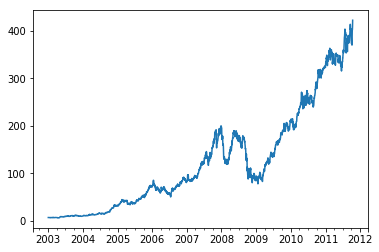

In [23]:
close_px['AAPL'].plot()

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


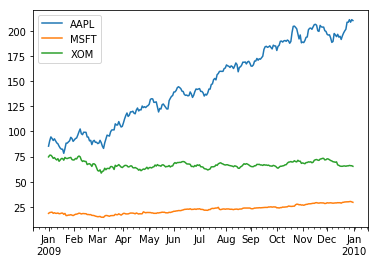

In [24]:
close_px.ix['2009'].plot()

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


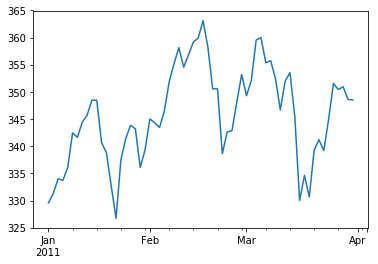

In [25]:
close_px['AAPL'].ix['01-2011':'03-2011'].plot()

In [26]:
p=pd.Period('2012Q4',freq='Q-DEC')

print (p.asfreq('D','start'))
print (p.asfreq('D','end'))

2012-10-01
2012-12-31


2003-03-31      7.07
2003-06-30      9.53
2003-09-30     10.36
2003-12-31     10.69
2004-03-31     13.52
2004-06-30     16.27
               ...  
2010-09-30    283.75
2010-12-31    322.56
2011-03-31    348.51
2011-06-30    335.67
2011-09-30    381.32
2011-12-31    422.00
Freq: Q-DEC, Name: AAPL, Length: 36, dtype: float64


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: fill_method is deprecated to .resample()
the new syntax is .resample(...).ffill()
  """Entry point for launching an IPython kernel.
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


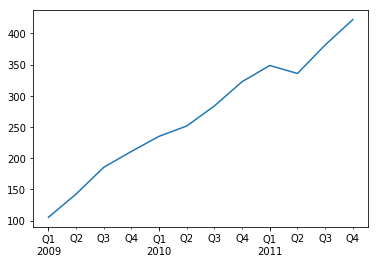

In [27]:
appl_q = close_px['AAPL'].resample('Q-DEC', fill_method='ffill').ffill()
print(appl_q)
appl_q.ix['2009':].plot()

              AAPL   MSFT    XOM
2003-01-02    7.40  21.11  29.22
2003-01-03    7.45  21.14  29.24
2003-01-06    7.45  21.52  29.96
2003-01-07    7.43  21.93  28.95
2003-01-08    7.28  21.31  28.83
2003-01-09    7.34  21.93  29.44
...            ...    ...    ...
2011-10-07  369.80  26.25  73.56
2011-10-10  388.81  26.94  76.28
2011-10-11  400.29  27.00  76.27
2011-10-12  402.19  26.96  77.16
2011-10-13  408.43  27.18  76.37
2011-10-14  422.00  27.27  78.11

[2292 rows x 3 columns]


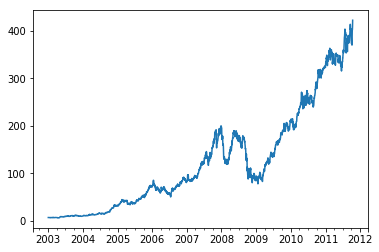

In [28]:
close_px = close_px.asfreq('B').fillna(method='ffill').ffill()
print(close_px)
close_px.AAPL.plot()

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=250,center=False).mean()
  """Entry point for launching an IPython kernel.


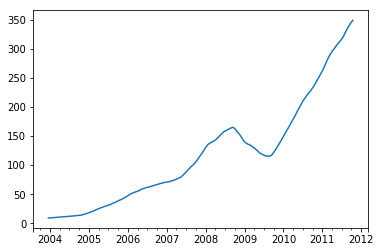

In [29]:
pd.rolling_mean(close_px.AAPL, 250).plot() #指定的非NA观测值是250个

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=60,center=False).mean()
  This is separate from the ipykernel package so we can avoid doing imports until


C:\Anaconda3\lib\site-packages\matplotlib\scale.py:111: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


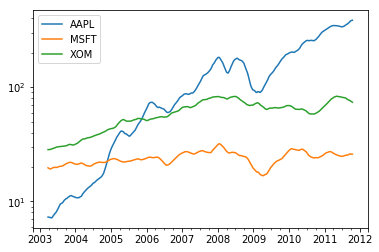

In [31]:
expanding_mean = lambda x: rolling_mean(x, len(x), min_periods=1)

pd.rolling_mean(close_px, 60).plot(logy=True)

#plt.close('all')

In [36]:
aapl_px = close_px.AAPL['2005':'2009']

ma60 = pd.rolling_mean(aapl_px, 60, min_periods=50)
ewma60 = pd.ewma(aapl_px, span=60)
print(ma60)
print(ewma60)

2005-01-03           NaN
2005-01-04           NaN
2005-01-05           NaN
2005-01-06           NaN
2005-01-07           NaN
2005-01-10           NaN
                 ...    
2009-12-24    196.765667
2009-12-25    197.168000
2009-12-28    197.594500
2009-12-29    197.912667
2009-12-30    198.269167
2009-12-31    198.626833
Freq: B, Name: AAPL, Length: 1304, dtype: float64
2005-01-03     31.650000
2005-01-04     31.812667
2005-01-05     31.963330
2005-01-06     32.046499
2005-01-07     32.596075
2005-01-10     32.936799
                 ...    
2009-12-24    193.635580
2009-12-25    194.140643
2009-12-28    194.713409
2009-12-29    195.185100
2009-12-30    195.724605
2009-12-31    196.216585
Freq: B, Name: AAPL, Length: 1304, dtype: float64


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=60,min_periods=50,center=False).mean()
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=60,min_periods=0,adjust=True,ignore_na=False).mean()
  after removing the cwd from sys.path.


Text(0.5,1,'Exponentially-weighted MA')

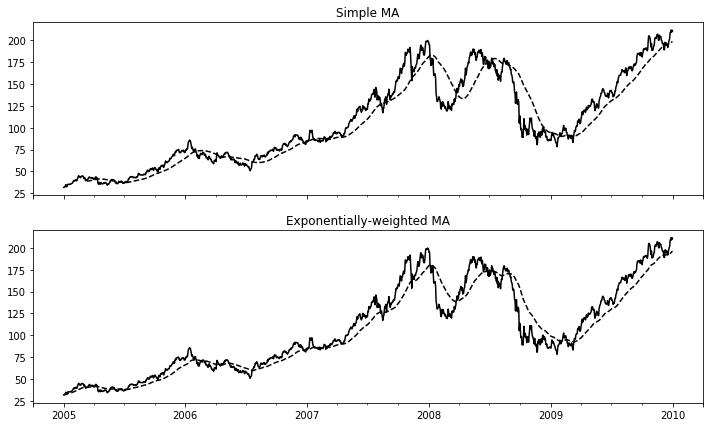

In [37]:
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=True,
                         figsize=(12, 7))
aapl_px.plot(style='k-', ax=axes[0])
ma60.plot(style='k--', ax=axes[0])
aapl_px.plot(style='k-', ax=axes[1])
ewma60.plot(style='k--', ax=axes[1])
axes[0].set_title('Simple MA')
axes[1].set_title('Exponentially-weighted MA')

In [40]:
print("close_px:","\n",close_px)
spx_px = close_px_all['SPX']
spx_px

close_px: 
               AAPL   MSFT    XOM
2003-01-02    7.40  21.11  29.22
2003-01-03    7.45  21.14  29.24
2003-01-06    7.45  21.52  29.96
2003-01-07    7.43  21.93  28.95
2003-01-08    7.28  21.31  28.83
2003-01-09    7.34  21.93  29.44
...            ...    ...    ...
2011-10-07  369.80  26.25  73.56
2011-10-10  388.81  26.94  76.28
2011-10-11  400.29  27.00  76.27
2011-10-12  402.19  26.96  77.16
2011-10-13  408.43  27.18  76.37
2011-10-14  422.00  27.27  78.11

[2292 rows x 3 columns]


2003-01-02     909.03
2003-01-03     908.59
2003-01-06     929.01
2003-01-07     922.93
2003-01-08     909.93
2003-01-09     927.57
               ...   
2011-10-07    1155.46
2011-10-10    1194.89
2011-10-11    1195.54
2011-10-12    1207.25
2011-10-13    1203.66
2011-10-14    1224.58
Name: SPX, Length: 2214, dtype: float64

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pd.rolling_corr is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=125,min_periods=100).corr(other=<Series>)
  This is separate from the ipykernel package so we can avoid doing imports until


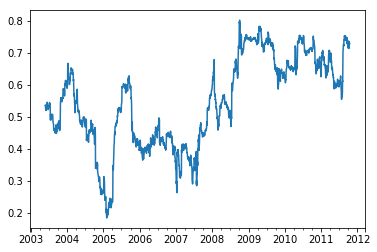

In [41]:
spx_rets = spx_px / spx_px.shift(1) - 1
returns = close_px.pct_change()
corr = pd.rolling_corr(returns.AAPL, spx_rets, 125, min_periods=100)
corr.plot()

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.rolling_corr is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=125,min_periods=100).corr(other=<Series>)
  """Entry point for launching an IPython kernel.


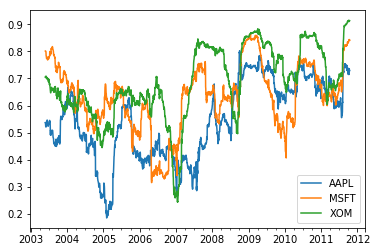

In [42]:
corr = pd.rolling_corr(returns, spx_rets, 125, min_periods=100)
corr.plot()

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pd.rolling_apply is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=250,center=False).apply(func=<function>,args=<tuple>,kwargs=<dict>)
  This is separate from the ipykernel package so we can avoid doing imports until


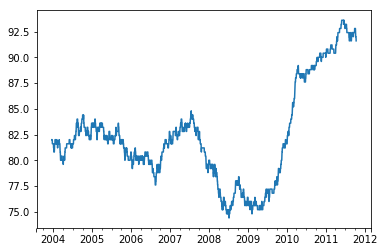

In [43]:
from scipy.stats import percentileofscore
score_at_2percent = lambda x: percentileofscore(x, 0.02)
result = pd.rolling_apply(returns.AAPL, 250, score_at_2percent)
result.plot()

In [44]:
####时序案例分析####
#参数初始化

o =os.getcwd()

discfile = o+"\\arima_data.xls"
forecastnum = 5

#读取数据，指定日期列为指标，Pandas自动将“日期”列识别为Datetime格式
data = pd.read_excel(discfile, index_col = u'日期')
data = pd.DataFrame(data,dtype=np.float64)
data

,销量
日期,
2015-01-01,3023.0
2015-01-02,3039.0
2015-01-03,3056.0
2015-01-04,3138.0
2015-01-05,3188.0
2015-01-06,3224.0
...,...
2015-02-01,4210.0
2015-02-02,4493.0


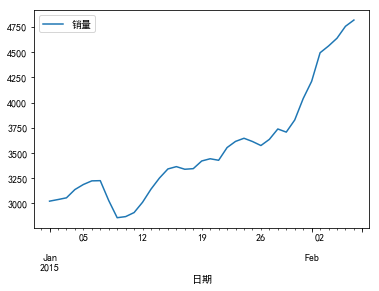

In [45]:
#时序图
plt.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号
data.plot()
plt.show()

C:\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
C:\Anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


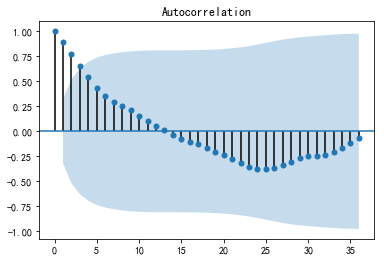

In [46]:
#自相关图
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data).show()

In [47]:
#平稳性检测
from statsmodels.tsa.stattools import adfuller as ADF
print( ADF(data[u'销量']))
#返回值依次为adf、pvalue、usedlag、nobs、critical values、icbest、regresults、resstore

(1.8137710150945268, 0.9983759421514264, 10, 26, {'1%': -3.7112123008648155, '5%': -2.981246804733728, '10%': -2.6300945562130176}, 299.46989866024177)


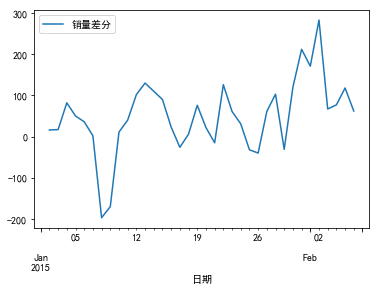

C:\Anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


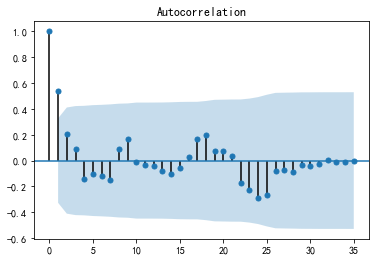

In [58]:
#差分后的结果
D_data = data.diff().dropna()
D_data.columns = [u'销量差分']
D_data.plot() #时序图
plt.show()
plot_acf(D_data).show() #自相关图

C:\Anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


(array([11.304]), array([0.0008]))

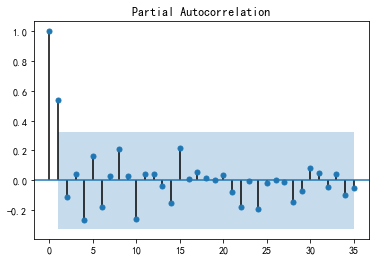

In [59]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(D_data).show() #偏自相关图
ADF(D_data[u'销量差分'])#平稳性检测

#白噪声检验
from statsmodels.stats.diagnostic import acorr_ljungbox
acorr_ljungbox(D_data, lags=1) #返回统计量和p值

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

#定阶
pmax = int(len(D_data)/10) #一般阶数不超过length/10
qmax = int(len(D_data)/10) #一般阶数不超过length/10
bic_matrix = [] #bic矩阵
for p in range(pmax+1):
  tmp = []
  for q in range(qmax+1):
    try: #存在部分报错，所以用try来跳过报错。
      tmp.append(ARIMA(data, (p,1,q)).fit().bic)
    except:
      tmp.append(None)
  bic_matrix.append(tmp)

bic_matrix = pd.DataFrame(bic_matrix) #从中可以找出最小值

p,q = bic_matrix.stack().idxmin() #先用stack展平，然后用idxmin找出最小值位置。
print(u'BIC最小的p值和q值为：%s、%s' %(p,q)) 
model = ARIMA(data, (0,1,1)).fit() #建立ARIMA(0, 1, 1)模型
model.summary() #给出一份模型报告
model.forecast(5) #作为期5天的预测，返回预测结果、标准误差、置信区间。

In [62]:
from statsmodels.tsa.arima_model import ARIMA

#定阶
pmax = int(len(D_data)/10) #一般阶数不超过length/10
qmax = int(len(D_data)/10) #一般阶数不超过length/10

bic_matrix = [] #bic矩阵
for p in range(pmax+1):
  tmp = []
  for q in range(qmax+1):
    try: #存在部分报错，所以用try来跳过报错。
      tmp.append(ARIMA(data, (p,1,q)).fit().bic)
      print(tmp)
    except:
      tmp.append(None)
      print(tmp)
  bic_matrix.append(tmp)

[432.0684724517514]


C:\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


[432.0684724517514, 422.51008220208723]
[432.0684724517514, 422.51008220208723, 426.08891067711096]
[432.0684724517514, 422.51008220208723, 426.08891067711096, 426.59550741773273]
[423.6282761488114]
[423.6282761488114, 426.07360132018675]
[423.6282761488114, 426.07360132018675, None]


C:\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:654: RuntimeWarning: divide by zero encountered in true_divide
  invmacoefs = -np.log((1-macoefs)/(1+macoefs))
C:\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:628: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:629: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()


[423.6282761488114, 426.07360132018675, None, None]
[426.7748237907677]


C:\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:654: RuntimeWarning: divide by zero encountered in log
  invmacoefs = -np.log((1-macoefs)/(1+macoefs))
C:\Anaconda3\lib\site-packages\statsmodels\tools\numdiff.py:243: RuntimeWarning: invalid value encountered in subtract
  **kwargs)).imag/2./hess[i, j]
C:\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:654: RuntimeWarning: invalid value encountered in true_divide
  R_mat, T_mat)
C:\Anaconda3\lib\site-packages\statsmodels\tools\numdiff.py:243: RuntimeWarning: invalid value encountered in multiply
  **kwargs)).imag/2./hess[i, j]
C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:473: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Anaco

[426.7748237907677, 427.3958212905085]
[426.7748237907677, 427.3958212905085, None]


C:\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:654: RuntimeWarning: invalid value encountered in log
  invmacoefs = -np.log((1-macoefs)/(1+macoefs))


[426.7748237907677, 427.3958212905085, None, None]
[430.3175243613982]
[430.3175243613982, None]
[430.3175243613982, None, None]
[430.3175243613982, None, None, 436.47810923125513]


In [ ]:
bic_matrix = [] #bic矩阵
for p in range(pmax+1):
  tmp = []
  for q in range(qmax+1):
    try: #存在部分报错，所以用try来跳过报错。
      tmp.append(ARIMA(data, (p,1,q)).fit().bic)
    except:
      tmp.append(None)
  bic_matrix.append(tmp)

bic_matrix = pd.DataFrame(bic_matrix) #从中可以找出最小值

p,q = bic_matrix.stack().idxmin() #先用stack展平，然后用idxmin找出最小值位置。
print(u'BIC最小的p值和q值为：%s、%s' %(p,q)) 
model = ARIMA(data, (0,1,1)).fit() #建立ARIMA(0, 1, 1)模型
model.summary() #给出一份模型报告
model.forecast(5) #作为期5天的预测，返回预测结果、标准误差、置信区间。

In [1]:
from statsmodels.tsa.arima_model import ARIMA

ARIMA()

C:\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


TypeError: __new__() missing 2 required positional arguments: 'endog' and 'order'